In [3]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hello World')

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
x=tf.constant(100)

In [6]:
type(x)

tensorflow.python.framework.ops.Tensor

In [7]:
sess = tf.Session()

In [8]:
sess.run(hello)

b'Hello World'

In [9]:
sess.run(x)

100

In [10]:
type(sess.run(x))

numpy.int32

In [11]:
x=tf.constant(2)
y=tf.constant(3)

In [15]:
with tf.Session() as sess:
    print('Addition: ',sess.run(x+y))
    print('Subtraction: ',sess.run(x-y))
    print('Multiplication: ',sess.run(x*y))
    print('Division: ',sess.run(x/y))

Addition:  5
Subtraction:  -1
Multiplication:  6
Division:  0.6666666666666666


In [16]:
x=tf.placeholder(tf.int32)

In [17]:
y=tf.placeholder(tf.int32)

In [18]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [23]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [24]:
d=feed_dict={x:20,y:30}
with tf.Session() as sess:
    print('addition:',sess.run(add,d))
    print('subtraction',sess.run(sub,d))
    print('multiplication',sess.run(mul,d))

addition: 50
subtraction -10
multiplication 600


In [25]:
import numpy as np

In [26]:
a=np.array([[5.0,5.0]])
b=np.array([[2.0],[2.0]])

In [27]:
b.shape

(2, 1)

In [28]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [29]:
matrix_multi = tf.matmul(mat1,mat2)

In [32]:
with tf.Session() as sess:
    print(sess.run(matrix_multi))

[[20.]]


In [ ]:
#MNIST DATASET 

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.test.images.shape

(10000, 784)

In [7]:
import matplotlib.pyplot as plt

In [10]:
mnist.train.images[1].shape

(784,)

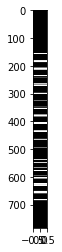

In [9]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray', aspect=0.02)

In [ ]:
#MODEL

In [12]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [13]:
W = tf.Variable(tf.zeros([784,10]))

In [14]:
b = tf.Variable(tf.zeros([10]))

In [15]:
y = tf.matmul(x,W)+b

In [16]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [17]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [19]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [21]:
train = optimizer.minimize(cross_entropy)

In [ ]:
#SESSION

In [22]:
init=tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9188
